In [1]:
import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
from fastprogress import progress_bar

import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [62]:
img_size = 64
num_workers = 10
batch_size = 1
train_transforms = torchvision.transforms.Compose([
     T.Resize(img_size + int(.25*img_size)),  # args.img_size + 1/4 *args.img_size
     #T.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
     T.ToTensor(),
     T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
 ])

In [108]:
# Custom Dataloader
## This dataloader processes images the same way that the torch dataloader does; however, one of them reads images in, in a different order
## To demonstrate the equivilance run with the trial image path

class CustomDataset(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        self.imgs_path = "/Users/richardkyle/Documents/University/current/AIML589/Data/SubURMP64/images/clean/trial/" # Set image path e.g. trial for demonstration, train for application
        file_list = glob.glob(self.imgs_path + "*")
        #print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for img_path in glob.glob(class_path + "/*.jpg"):
                self.data.append([img_path, class_name])
        #print(self.data)
        #self.class_map = {"dogs" : 0, "cats": 1}
        self.img_dim = (64, 64)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = Image.open(img_path)
        img = img.convert("RGB")
        #img = np.array(img)
        #img = cv2.resize(img, self.img_dim)
        #class_id = self.class_map[class_name]
        #img_tensor = torch.from_numpy(img)
        #img_tensor = img_tensor.permute(2, 0, 1)
        #class_id = torch.tensor([class_id])
        img_path = img_path.split("/")[-1]

        if self.transform:
            img = self.transform(img)

        return img, img_path

In [109]:
# This code extracts all images and there associated labels. Use label information to read in embeddings into the main Diffusion model script
dataset = CustomDataset(transform=train_transforms)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

imgsList = []
labsList = []
for imgs, labs in data_loader:
    imgsList.append(imgs)
    labsList.append(labs)

In [110]:
# This code calls the default dataloader 
train_dataset = torchvision.datasets.ImageFolder('/Users/richardkyle/Documents/University/current/AIML589/Data/SubURMP64/images/clean/trial', transform=train_transforms)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
imgsListOriginal = []
labsListOriginal = []
for imgs, labs in train_dataloader:
    imgsListOriginal.append(imgs)
    labsListOriginal.append(labs)

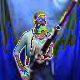

In [111]:
# Visualise image from custom dataloader
tran = T.ToPILImage()
imgsz = torch.squeeze(imgsList[-1], 0)
imgsz = tran(imgsz)
imgsz

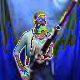

In [113]:
# Visualise image from default dataloader
tran = T.ToPILImage()
imgsz = torch.squeeze(imgsListOriginal[0], 0)
imgsz = tran(imgsz)
imgsz

In [116]:
# See numeric representation of custom dataloader for image i
imgsList[-1]

tensor([[[[-0.7333, -0.8745, -0.8118,  ..., -0.5373, -0.8510, -0.8745],
          [-0.7333, -0.8667, -0.8039,  ..., -0.6078, -0.8118, -0.9216],
          [-0.7255, -0.8667, -0.7961,  ..., -0.6549, -0.7804, -0.9529],
          ...,
          [-0.9686, -0.9765, -0.9843,  ..., -0.9294, -0.9373, -0.9686],
          [-0.9686, -0.9765, -0.9843,  ..., -0.9373, -0.9451, -0.9765],
          [-0.9765, -0.9843, -0.9843,  ..., -0.9373, -0.9451, -0.9765]],

         [[-0.7020, -0.8196, -0.7569,  ..., -0.5294, -0.7882, -0.7961],
          [-0.7020, -0.8196, -0.7490,  ..., -0.6078, -0.7569, -0.8353],
          [-0.6941, -0.8118, -0.7412,  ..., -0.6706, -0.7333, -0.8667],
          ...,
          [-0.8902, -0.9059, -0.9294,  ..., -0.9529, -0.9608, -0.9922],
          [-0.8902, -0.9059, -0.9294,  ..., -0.9529, -0.9686, -1.0000],
          [-0.8824, -0.9059, -0.9294,  ..., -0.9529, -0.9686, -1.0000]],

         [[ 0.3490,  0.2235,  0.2863,  ..., -0.1059,  0.0745,  0.4353],
          [ 0.3490,  0.2314,  

In [114]:
# See numeric representation of default dataloader for image i
imgsListOriginal[0]

tensor([[[[-0.7333, -0.8745, -0.8118,  ..., -0.5373, -0.8510, -0.8745],
          [-0.7333, -0.8667, -0.8039,  ..., -0.6078, -0.8118, -0.9216],
          [-0.7255, -0.8667, -0.7961,  ..., -0.6549, -0.7804, -0.9529],
          ...,
          [-0.9686, -0.9765, -0.9843,  ..., -0.9294, -0.9373, -0.9686],
          [-0.9686, -0.9765, -0.9843,  ..., -0.9373, -0.9451, -0.9765],
          [-0.9765, -0.9843, -0.9843,  ..., -0.9373, -0.9451, -0.9765]],

         [[-0.7020, -0.8196, -0.7569,  ..., -0.5294, -0.7882, -0.7961],
          [-0.7020, -0.8196, -0.7490,  ..., -0.6078, -0.7569, -0.8353],
          [-0.6941, -0.8118, -0.7412,  ..., -0.6706, -0.7333, -0.8667],
          ...,
          [-0.8902, -0.9059, -0.9294,  ..., -0.9529, -0.9608, -0.9922],
          [-0.8902, -0.9059, -0.9294,  ..., -0.9529, -0.9686, -1.0000],
          [-0.8824, -0.9059, -0.9294,  ..., -0.9529, -0.9686, -1.0000]],

         [[ 0.3490,  0.2235,  0.2863,  ..., -0.1059,  0.0745,  0.4353],
          [ 0.3490,  0.2314,  